<a href="https://colab.research.google.com/github/AvishekRoy16/DeepLearning/blob/master/5-Optimisation-Algorithms/GradientDescentAlgo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Outline

1. Modified SN class
2. Overall setup - What is the data, model, task
3. Plotting functions - 3d, contour
4. Individual algorithms and how they perform
5. Exercise

In [22]:
#used for 3D Plotting
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

from matplotlib import cm
import matplotlib.colors

# For animated plots
from matplotlib import animation, rc
from IPython.display import HTML

import numpy as np

In [23]:
class SN:
  #This is a single sigmoid neuron - takes only a single input
  '''
  We are taking the w_init & b_ init which are the initial value we will like to have for w and b
  algo argument - tells which algo do we want to use for Gradient Descent
  We have a few array/list varibes, suffixed with '_h' this indicated that these are history variables.
  w_h,b_h are self explanatory, e_h tracks the error/loss at the current moment
  algo is being stored in an internal variable.
  '''
  def __init__(self, w_init, b_init, algo):
    self.w = w_init
    self.b = b_init
    self.w_h = []
    self.b_h = []
    self.e_h = []
    self.algo = algo
  
  '''  
  Now the signoid function additionaly takes w, b as inputs. 
  We will be calculating the sigmoid value currently moduled by the class,
  but there is a need to run the sigmoid function for some other values
  so here if w and b if spefied we will use them or else we will use the default
  '''
  def sigmoid(self, x, w=None, b=None):
    if w is None:
      w = self.w
    if b is None:
      b = self.b
    return 1. / (1. + np.exp(-(w*x + b))) # here w and b are scalar inputs
  
  '''  
  Given an X and Y which is a training data that we have and also 
  w,b optionally spefied like the above sigmoid function 
  we would line to compute the MSE- mean squared error    
  '''
  def error(self, X, Y, w=None, b=None):
    if w is None:
      w = self.w
    if b is None:
      b = self.b
    err = 0
    for x, y in zip(X, Y):
      err += 0.5 * (self.sigmoid(x, w, b) - y) ** 2
    return err
  '''
  returns the gradient of the sigoid w.r.t to the input
  We have the ability to use some other values of w and b 
  just as in the case of sigmoid function 
  to calculate the sigmoid at some other fx^n not that we are currently at
  '''
  def grad_w(self, x, y, w=None, b=None):
    if w is None:
      w = self.w
    if b is None:
      b = self.b
    y_pred = self.sigmoid(x, w, b)
    return (y_pred - y) * y_pred * (1 - y_pred) * x

  '''  
  same applies for grad b as in grad a
  The only change is that the * x in return goes away
  therefore it produces the gradienof the loss (in the error fx^n) w.r.t w & b
  '''
  def grad_b(self, x, y, w=None, b=None):
    if w is None:
      w = self.w
    if b is None:
      b = self.b
    y_pred = self.sigmoid(x, w, b)
    return (y_pred - y) * y_pred * (1 - y_pred)
  
  '''  
  The fit fx^n takes X and Y the training data and a bunch of other stuff,
  epochs - no. of times we go over the data, eta - learning rate
  other parameters are comming fromt the different GD learning algo
  thery have been sassigned default value which ofcourse can vbe overwritten
  '''
  def fit(self, X, Y, 
          epochs=100, eta=0.01, gamma=0.9, mini_batch_size=100, eps=1e-8,  
          beta=0.9, beta1=0.9, beta2=0.9
         ):
    self.w_h = []
    self.b_h = []
    self.e_h = []
    self.X = X
    self.Y = Y
    
    # There are many of algos for the different types of Gradient Descent Learning Algos:
    # These algos are avilable in the init fx^n's itself as we saw above
    
    '''
    This is the Gradient decent that we are already familiar with
    we simply iterate over all the data eopchs no. of times
    each case we initialise dw and db value
    for every inpu we accumalate dw and db values, by calling the respective grad fucntions
    then we have the update rule, this take only one parameter for the fit function
    which is the learning rate - eta
    after ebery update to w and b we call the append log functions
    It apppends the current value of weight and bias into the list that we are maintining
    and also calculates the error at the current point
    '''
  def fit(self, X, Y, 
          epochs=100, eta=0.01, gamma=0.9, mini_batch_size=100, eps=1e-8,  
          beta=0.9, beta1=0.9, beta2=0.9
          ):
    self.w_h = []
    self.b_h = []
    self.e_h = []
    self.X = X
    self.Y = Y
    
    if self.algo == 'GD':
      for i in range(epochs):
        dw, db = 0, 0
        for x, y in zip(X, Y):
          dw += self.grad_w(x, y)
          db += self.grad_b(x, y)
        self.w -= eta * dw / X.shape[0]
        self.b -= eta * db / X.shape[0]
        self.append_log()
        
    elif self.algo == 'MiniBatch':
      for i in range(epochs):
        dw, db = 0, 0
        points_seen = 0
        for x, y in zip(X, Y):
          dw += self.grad_w(x, y)
          db += self.grad_b(x, y)
          points_seen += 1
          if points_seen % mini_batch_size == 0:
            self.w -= eta * dw / mini_batch_size
            self.b -= eta * db / mini_batch_size
            self.append_log()
            dw, db = 0, 0
        
    elif self.algo == 'Momentum':
      v_w, v_b = 0, 0
      for i in range(epochs):
        dw, db = 0, 0
        for x, y in zip(X, Y):
          dw += self.grad_w(x, y)
          db += self.grad_b(x, y)
        v_w = gamma * v_w + eta * dw 
        v_b = gamma * v_b + eta * db
        self.w = self.w - v_w
        self.b = self.b - v_b
        self.append_log()
        
    elif self.algo == 'NAG':
      v_w, v_b = 0, 0
      for i in range(epochs):
        dw, db = 0, 0
        v_w = gamma * v_w
        v_b = gamma * v_b
        for x, y in zip(X, Y):
          dw += self.grad_w(x, y, self.w - v_w, self.b - v_b)
          db += self.grad_b(x, y, self.w - v_w, self.b - v_b)
        v_w = v_w + eta * dw
        v_b = v_b + eta * db
        self.w = self.w - v_w
        self.b = self.b - v_b
        self.append_log()

  '''It apppends the current value of weight and bias into the list that we are maintining
    and also calculates the error at the current point'''
  def append_log(self):
    self.w_h.append(self.w)
    self.b_h.append(self.b)
    self.e_h.append(self.error(self.X, self.Y))

In [24]:
# Config parameters for an experiment - will change according to the experiment we are running
# X = np.asarray([3.5, 0.35, 3.2, -2.0, 1.5, -0.5])
# Y = np.asarray([0.5, 0.50, 0.5,  0.5, 0.1,  0.3])

X = np.asarray([0.5,2.5])
Y = np.asarray([0.2,0.9])

algo = 'GD'

w_init = -2
b_init = -2

w_min = -7
w_max = 5

b_min = -5
b_max = 5

epochs = 1000
# mini_batch_size = 6
# gamma = 0.9
eta = 1

animation_frames = 20

plot_2d = False
plot_3d = True # contour plots

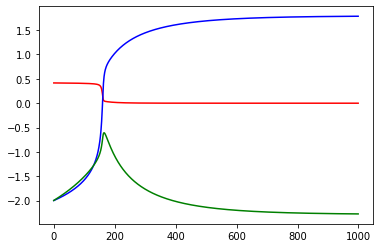

In [25]:
sn = SN(w_init, b_init, algo)
sn.fit(X, Y, epochs=epochs, eta=eta)
plt.plot(sn.e_h, 'r')
plt.plot(sn.w_h, 'b')
plt.plot(sn.b_h, 'g')
plt.show()

In [26]:
def plot_animate_3d(i):
  i = int(i*(epochs/animation_frames))
  line1.set_data(sn.w_h[:i+1], sn.b_h[:i+1])
  line1.set_3d_properties(sn.e_h[:i+1])
  line2.set_data(sn.w_h[:i+1], sn.b_h[:i+1])
  line2.set_3d_properties(np.zeros(i+1) - 1)
  title.set_text('Epoch: {: d}, Error: {:.4f}'.format(i, sn.e_h[i]))
  return line1, line2, title

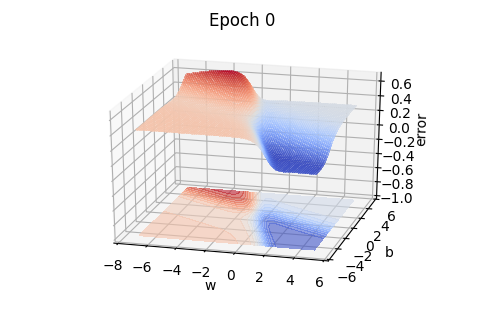

In [27]:
# Cells specifies what to do plot_3d is called
if plot_3d: 
  W = np.linspace(w_min, w_max, 256)# linearspace range and then how may points we will like to have(256)
  b = np.linspace(b_min, b_max, 256)
  
  # We will make a meshgrid -  Which takes all possible combinations of w and b
  WW, BB = np.meshgrid(W, b)
  
  # For each pair of w and b using meshgrid we will call the sn.error function
  # X and Y values are Training data, but we are giveing individual value of W and b from our sample list.
  # So basically w and b are specified externally here as we have seen we had a option to do that in the sigomid class
  Z = sn.error(X, Y, WW, BB)

  fig = plt.figure(dpi=100)
  ax = fig.gca(projection='3d')
  
  # We will do 2 kinds of plot a 3D pot which will actually show the 3D plot of the error wrt the weight and the bias 
  surf = ax.plot_surface(WW, BB, Z, rstride=3, cstride=3, alpha=0.5, cmap=cm.coolwarm, linewidth=0, antialiased=False)
  # The secnond kind of plot is a conotur plot. We are plotting 25 different countour lines. direction of countouring is on the z axis
  cset = ax.contourf(WW, BB, Z, 25, zdir='z', offset=-1, alpha=0.6, cmap=cm.coolwarm)
  
  # Settingt the limits we have used for searching these points and adding them by one to have enough room
  ax.set_xlabel('w')
  ax.set_xlim(w_min - 1, w_max + 1)
  ax.set_ylabel('b')
  ax.set_ylim(b_min - 1, b_max + 1)
  ax.set_zlabel('error')
  ax.set_zlim(-1, np.max(Z))
  
  # When  plotting a 3D plot it is important to see where we would like to see the plot from(form which direction)
  ax.view_init (elev=25, azim=-75) # azim = -20
  ax.dist=12  
  title = ax.set_title('Epoch 0')

In [28]:
# To show what the algo is doing dynamically, which is captured in our history variable 
if plot_3d: 
  i = 0
  # w_h, b_h and e_h, corresponding to the wiighs, bias and error respectively
  # Aling with the surface plot we are showing a scatter plot 
  line1, = ax.plot(sn.w_h[:i+1], sn.b_h[:i+1], sn.e_h[:i+1], color='black',marker='.')
  line2, = ax.plot(sn.w_h[:i+1], sn.b_h[:i+1], np.zeros(i+1) - 1, color='red', marker='.')
  
  # As we want to create an animation we are callin the FuncAnimation it is taking the figure handle
  # We are caliing the plot animate function, described above everytime we want to generate a new frame
  anim = animation.FuncAnimation(fig, func=plot_animate_3d, frames=animation_frames)
  # rc function creates animation that is shown inline using the libraries that we have used
  rc('animation', html='jshtml')
  anim

In [29]:
if algo == 'GD':
  print('algo = {}, eta = {}'.format(algo, eta))
elif algo == 'Momentum' or algo == 'NAG':
  print('algo = {}, eta = {}, gamma = {}'.format(algo, eta, gamma))
elif algo == 'MiniBatch':
  print('algo = {}, eta = {}, batch size = {}'.format(algo, eta, mini_batch_size))
elif algo == 'AdaGrad' or algo == 'RMSProp':
  print('algo = {}, eta = {}, eps = {}'.format(algo, eta, eps))
anim

algo = GD, eta = 1
